In [1]:
# Importing Necessary Libraries
import os
import shutil

In [10]:
# Original Dataset Directory
original_dataset_dir = "E:/train"

In [9]:
# Making A Base Directory
base_dir  = "E:/cats_and_dogs_small"
os.mkdir(base_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/cats_and_dogs_small'

In [5]:
# Making Train, Test And Validation Directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/cats_and_dogs_small\\train'

In [6]:
# Making Train, Test And Validation Directories of Cats And Dogs
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/cats_and_dogs_small\\train\\cats'

In [7]:
# Shifting 1000 Images Of Cats Into Small Dataset Directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Shifting 500 Images Into Validation Directory (Cats)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

NameError: name 'validation_cats_dir' is not defined

In [10]:
# Shifting 500 Inages Into Test Directory (Cats)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Shifting 1000 Images Of Dogs Into Small Dataset Directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Shifting 500 Images Into Validation Directory (Dogs)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Shifting 500 Inages Into Test Directory (Dogs)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
# Checking Number of Images In The Directories
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

NameError: name 'train_cats_dir' is not defined

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Defining Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
# Making A Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
# Compiling Model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [21]:
# Rescaling Data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Generating Training Data
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [23]:
# Generating Validation Data
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [24]:
# Fitting Model On 30 Epochs
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 167s 2s/step - loss: 0.6900 - accuracy: 0.5345 - val_loss: 0.6641 - val_accuracy: 0.6090
Epoch 2/30
100/100 [==============================] - 162s 2s/step - loss: 0.6509 - accuracy: 0.6310 - val_loss: 0.6439 - val_accuracy: 0.6070
Epoch 3/30
100/100 [==============================] - 162s 2s/step - loss: 0.6012 - accuracy: 0.6670 - val_loss: 0.6052 - val_accuracy: 0.6660
Epoch 4/30
100/100 [==============================] - 158s 2s/step - loss: 0.5538 - accuracy: 0.7020 - val_loss: 0.6619 - val_accuracy: 0.5990
Epoch 5/30
100/100 [==============================] - 180s 2s/step - loss: 0.5314 - accuracy: 0.7210 - val_loss: 0.5833 - val_accuracy: 0.6810
Epoch 6/30
100/100 [==============================] - 177s 2s/step - loss: 0.5086 - accuracy: 0.7390 - val_loss: 0.5768 - val_accuracy: 0.6910
Epoch 7/30
100/100 [==============================] - 204s 2s/step - loss: 0.4810 - accuracy: 0.7605 - val_loss: 0.5641 - val_accuracy: 0.7080

In [30]:
model.save('cats_and_dogs_small_1.h5')

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [25]:
import matplotlib.pyplot as plt

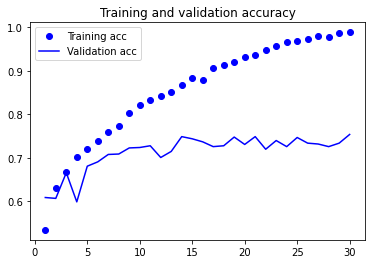

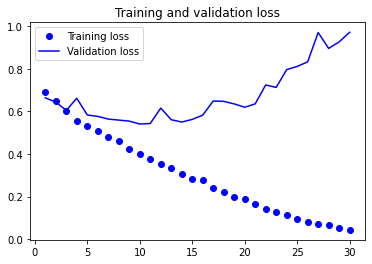

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

NameError: name 'conv_base' is not defined